In [1]:
# %%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list


Toggle code

var_type (463, 14)


In [2]:
dataset_name = "W23_only"
BES_Panel = pd.read_stata(BES_data_folder+dataset_name+os.sep+"BES2019_W23_v25.0.dta")

In [3]:
#### get factors - PCA/FA

In [3]:
BES_num = pd.get_dummies(BES_Panel)
BES_num = BES_num[BES_Panel["country"]=="England"]
drop_cols = ['id','wt']
# BES_num.sum().sort_values()[BES_num.sum().sort_values()<200].hist(bins=200)
drop_cols.extend(list(BES_num.sum()[BES_num.sum()<=20].index))
BES_num = BES_num.select_dtypes('number').drop(drop_cols,axis=1) # drop start/finish datetime columns
BES_num = BES_num.fillna(BES_num.mean())

Wall time: 6.01 s


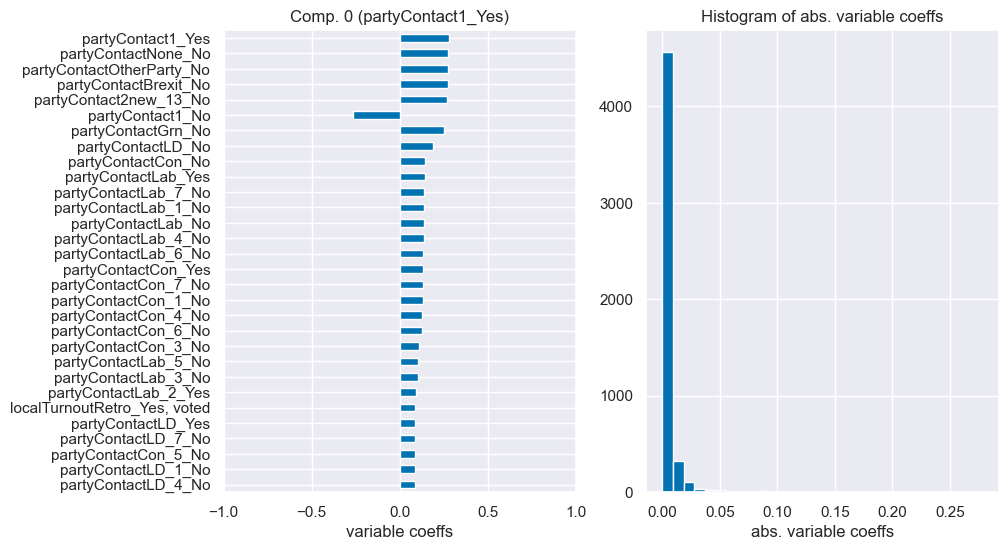

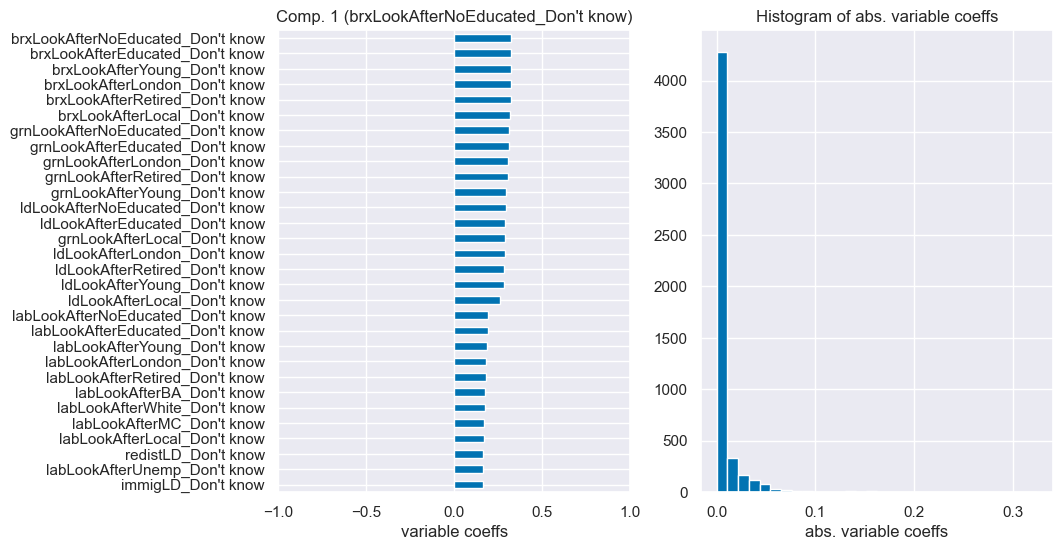

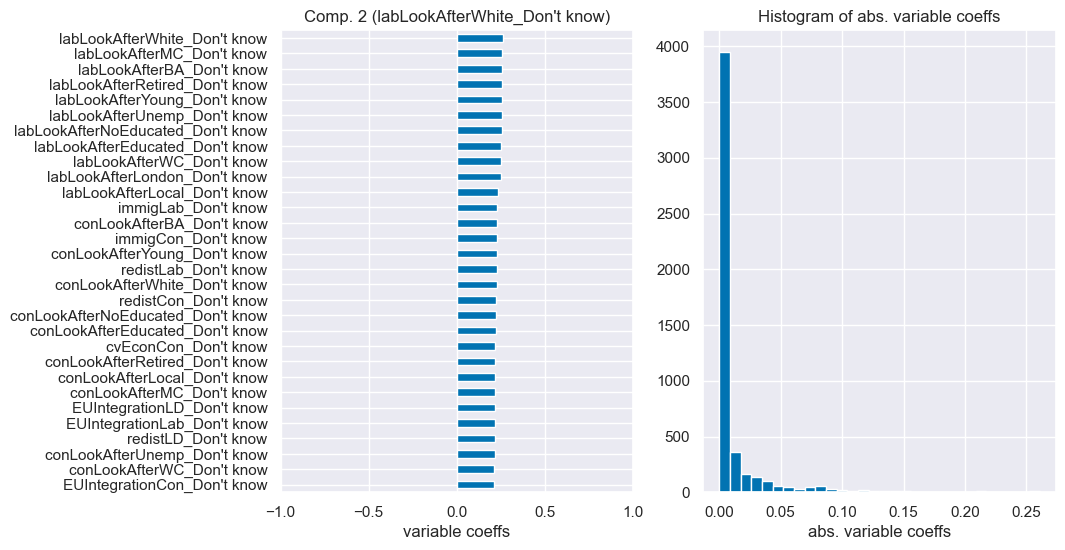

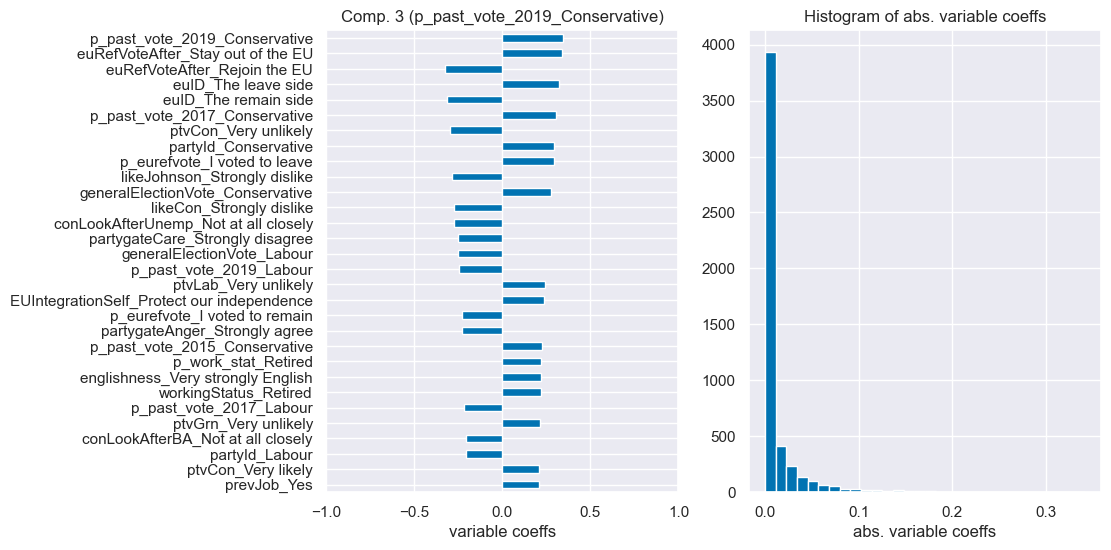

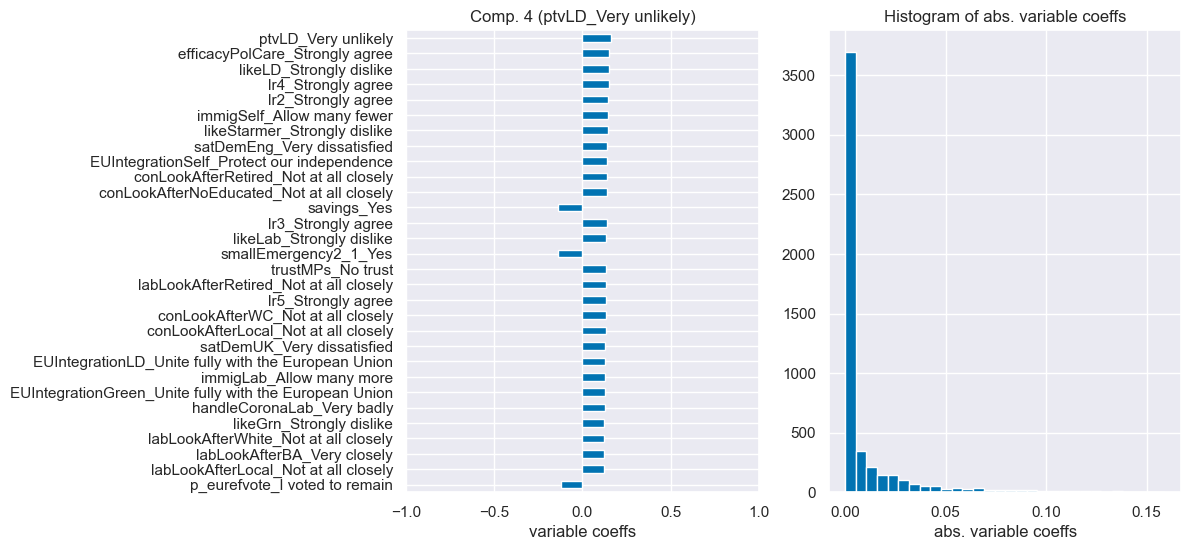

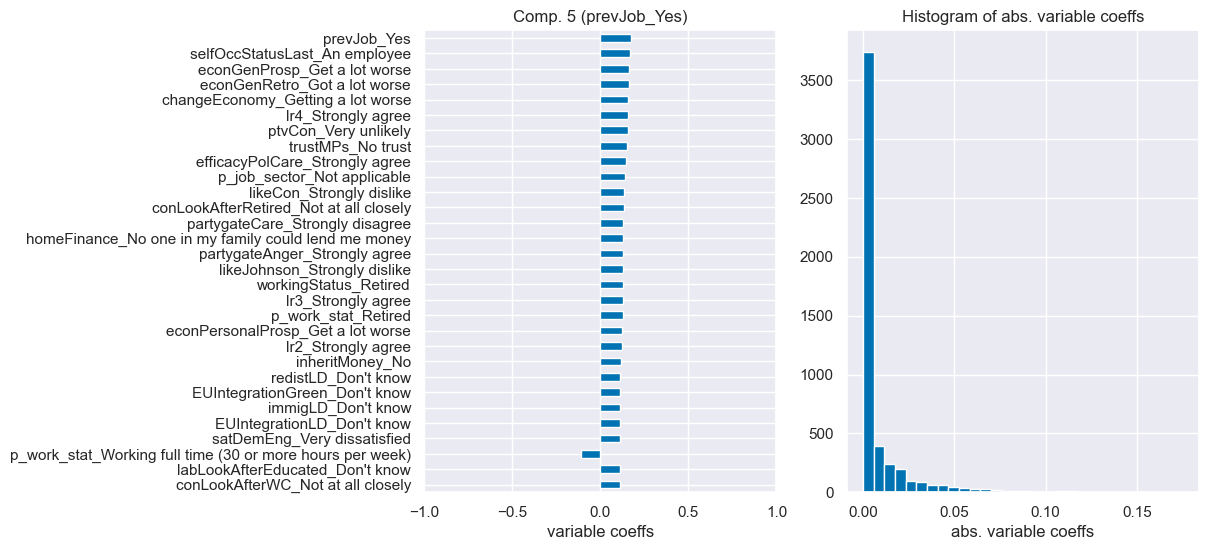

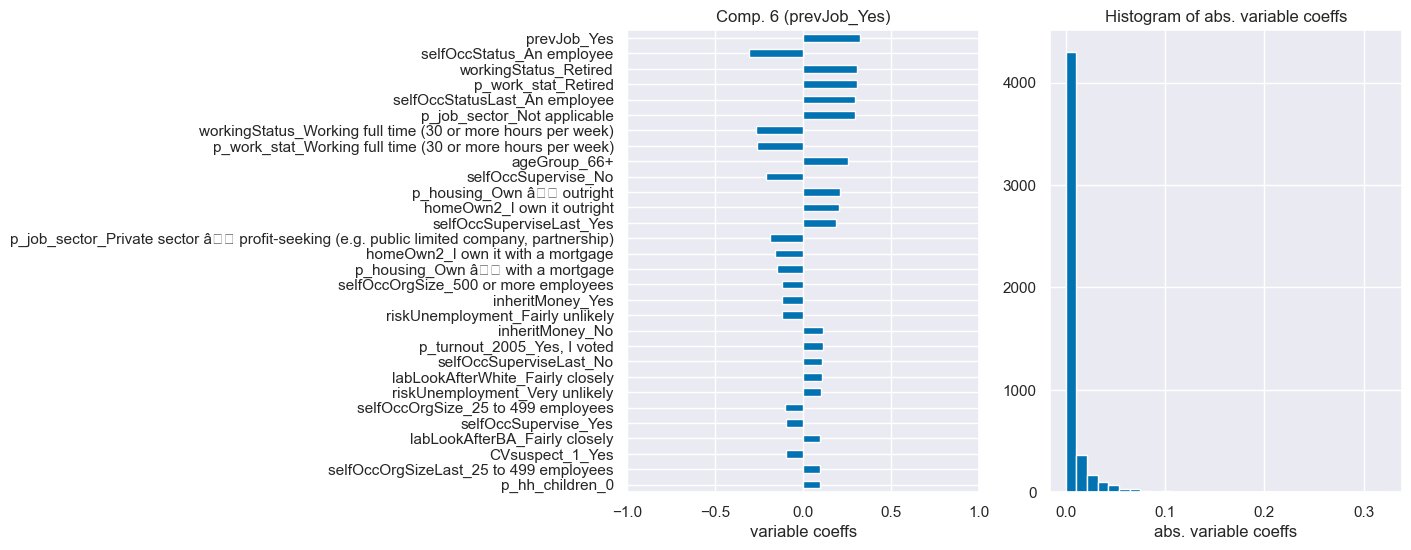

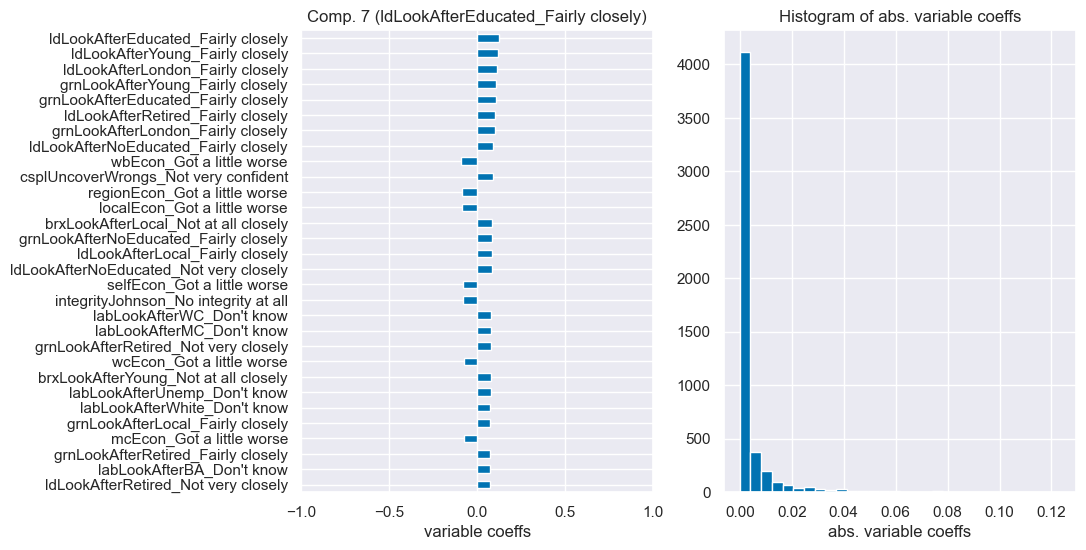

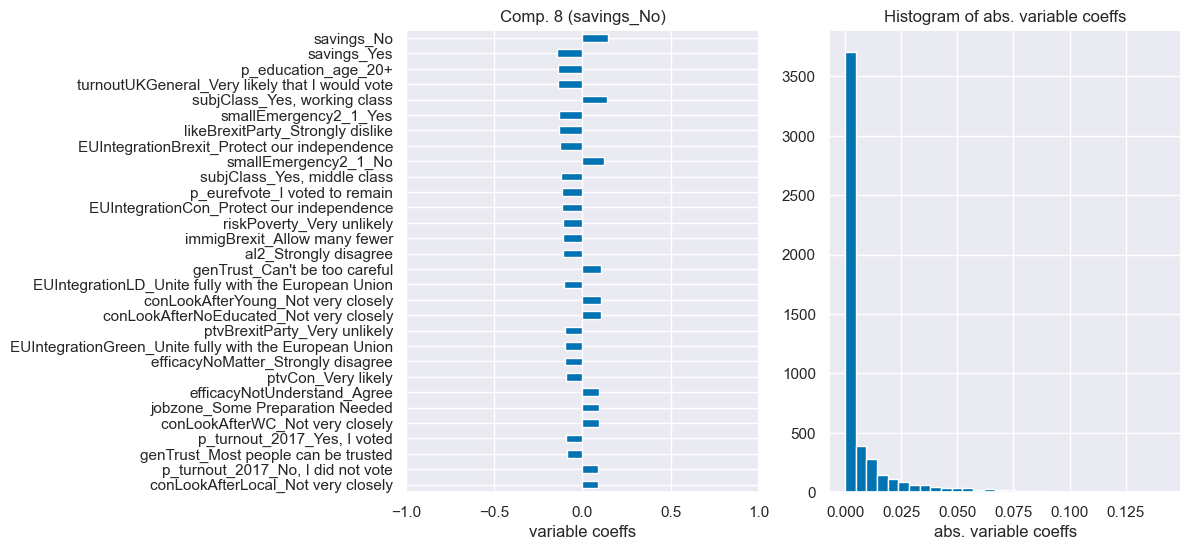

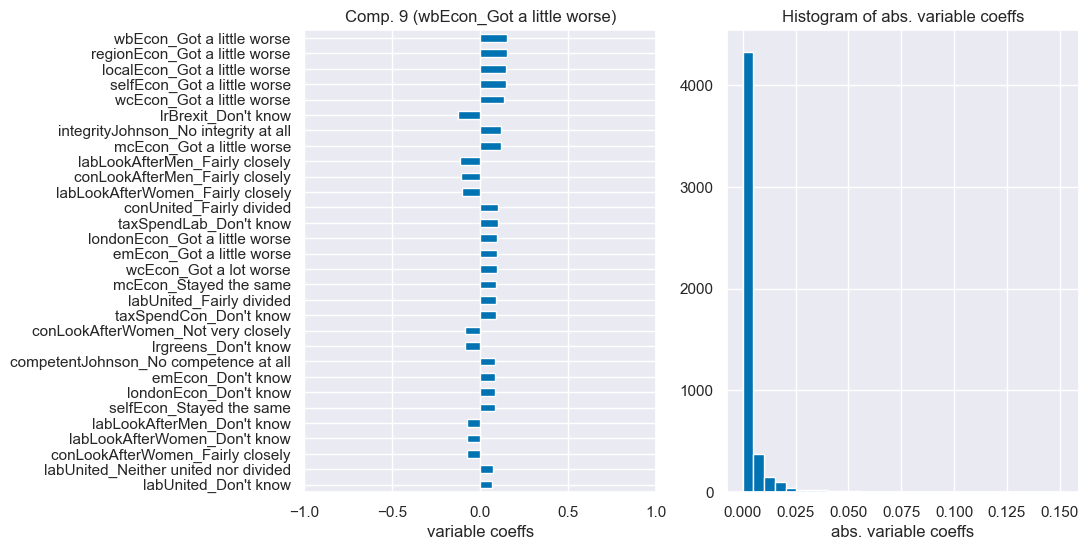

In [5]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

# decomp = PCA(svd_solver="full",n_components =n_components )
decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

Wall time: 39.5 s


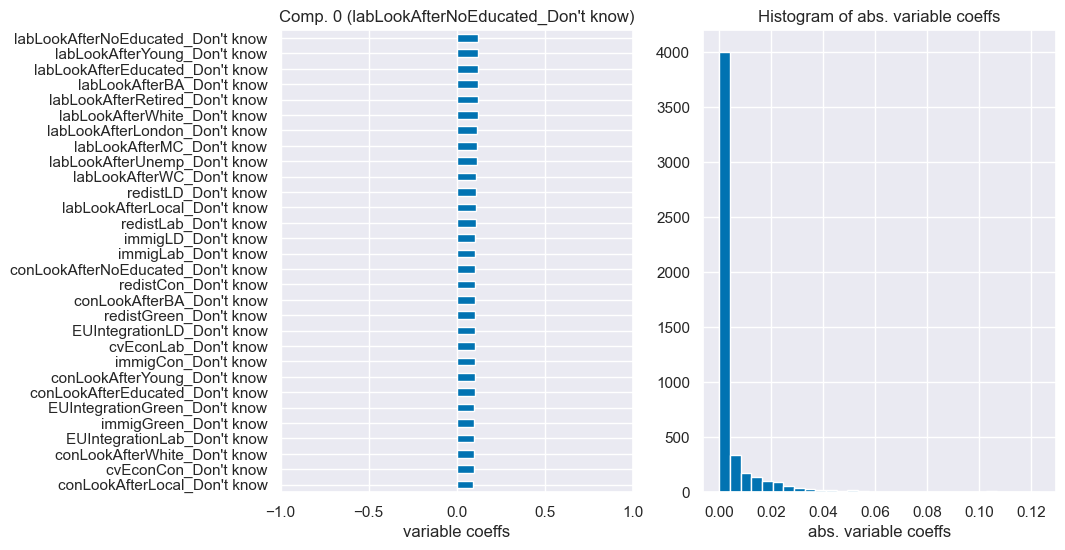

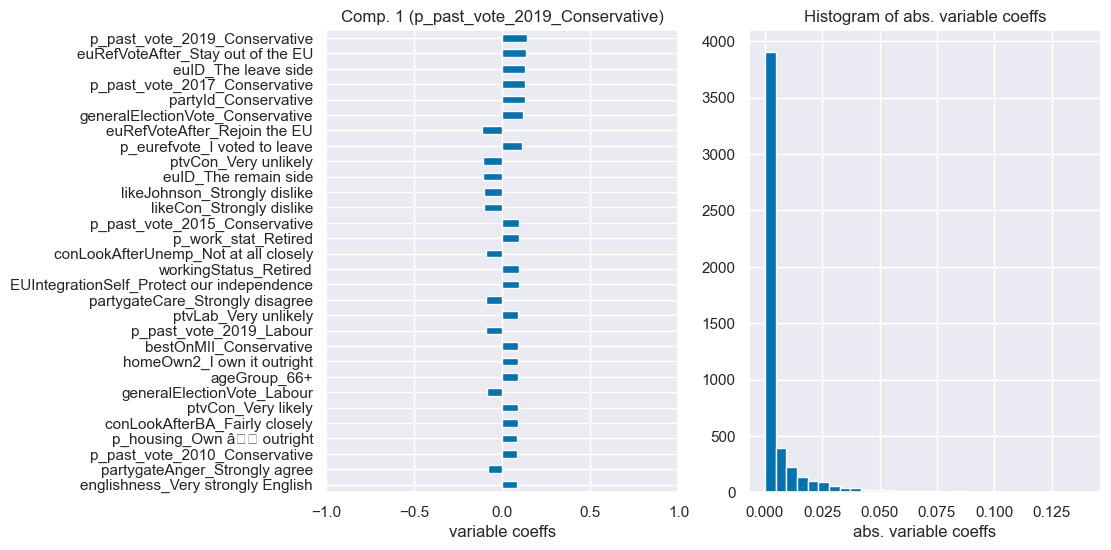

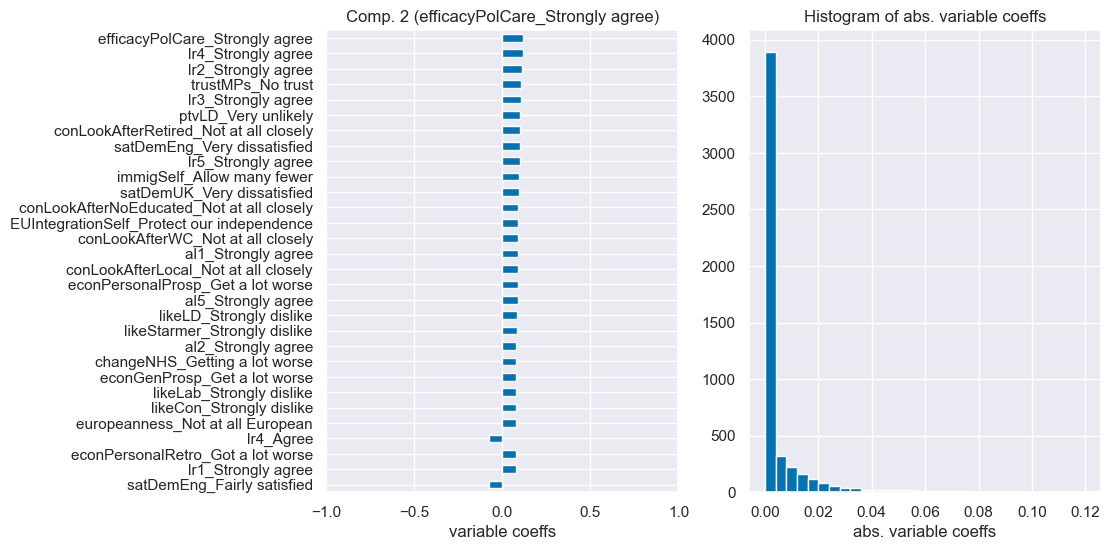

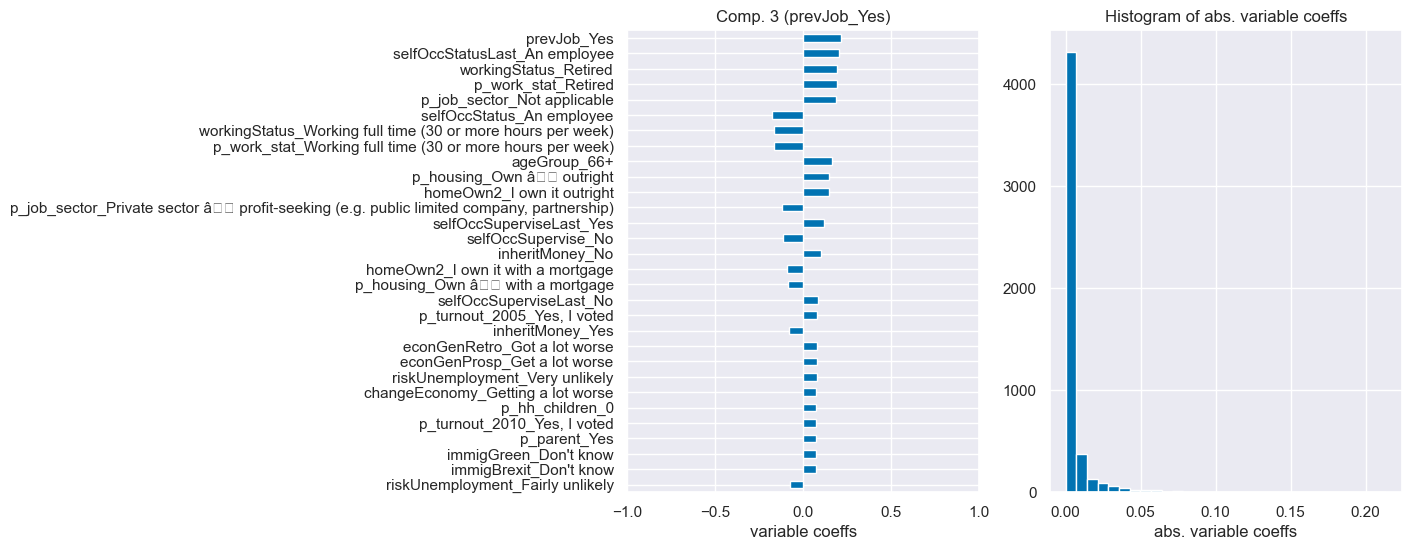

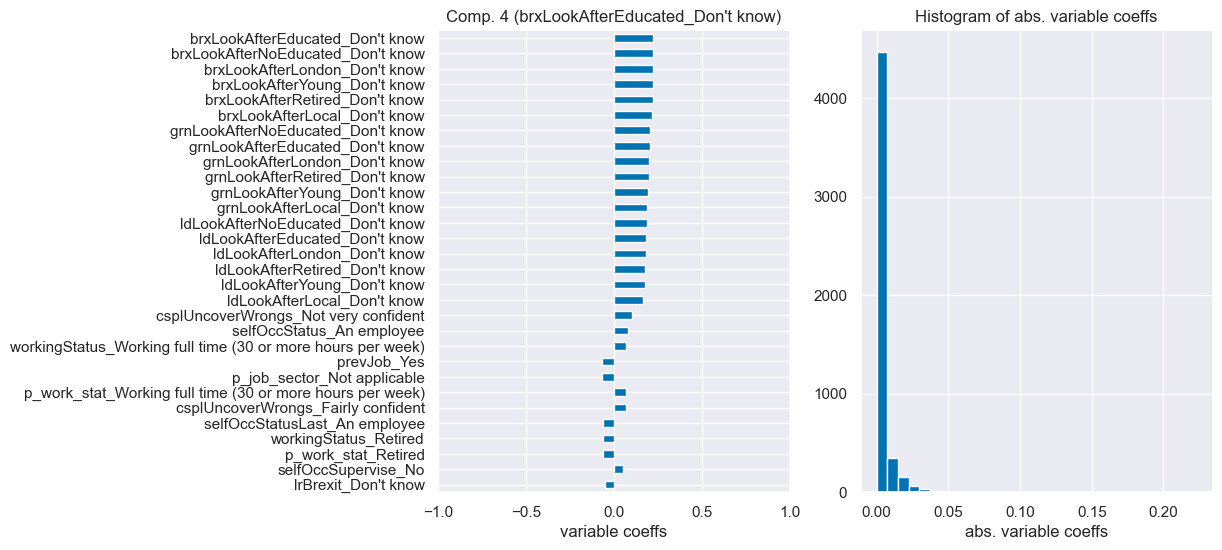

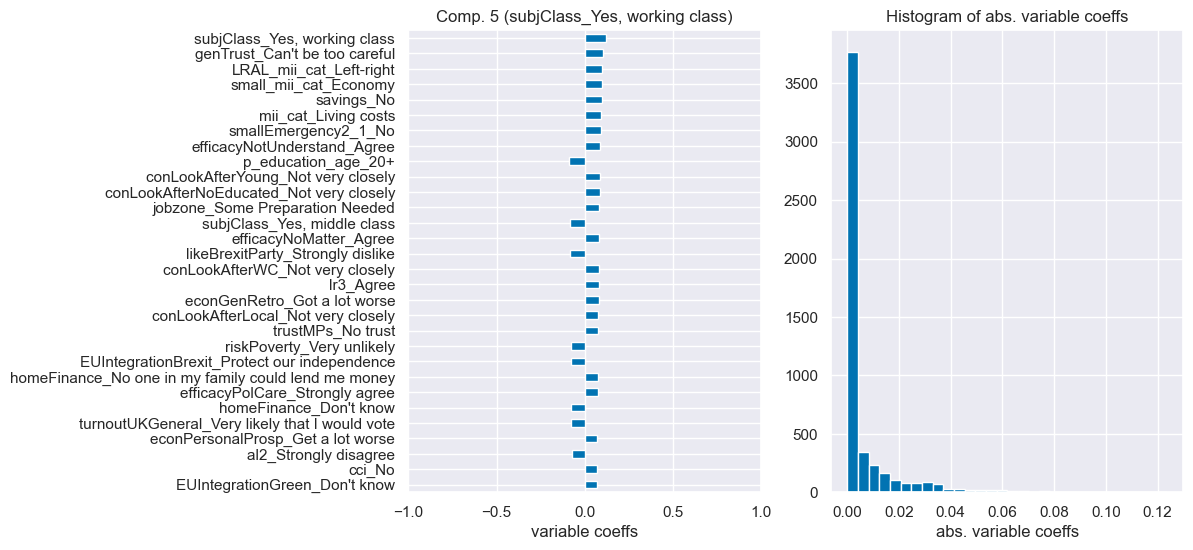

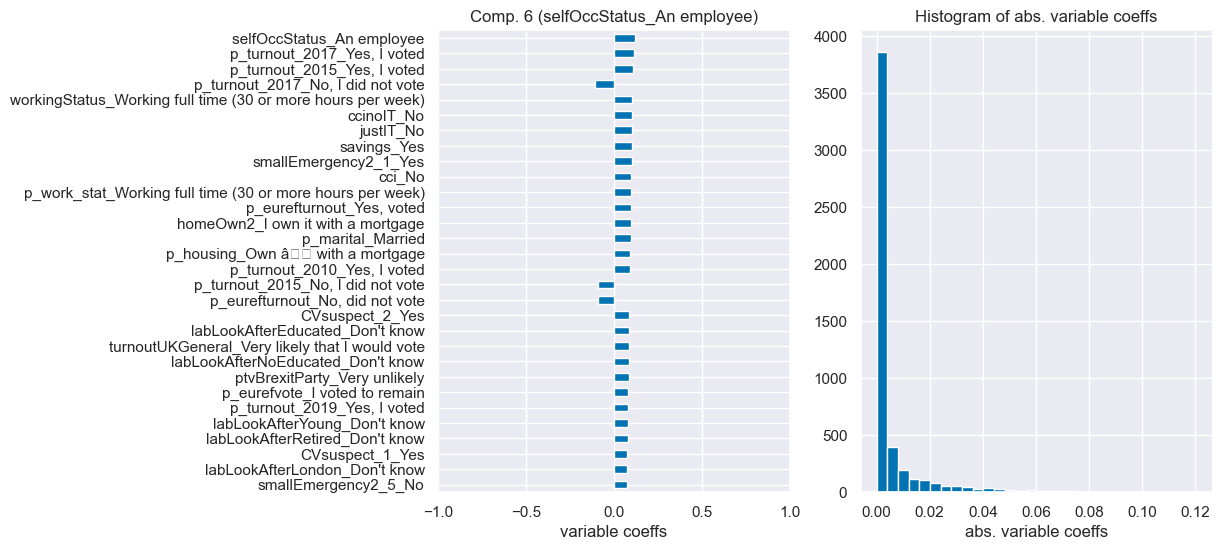

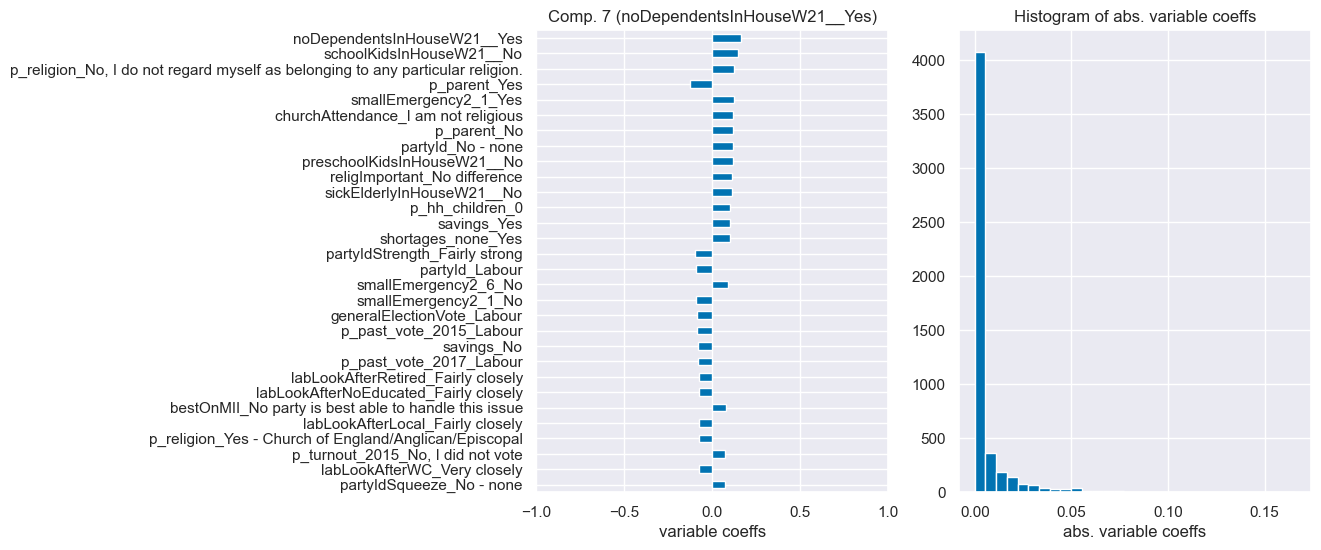

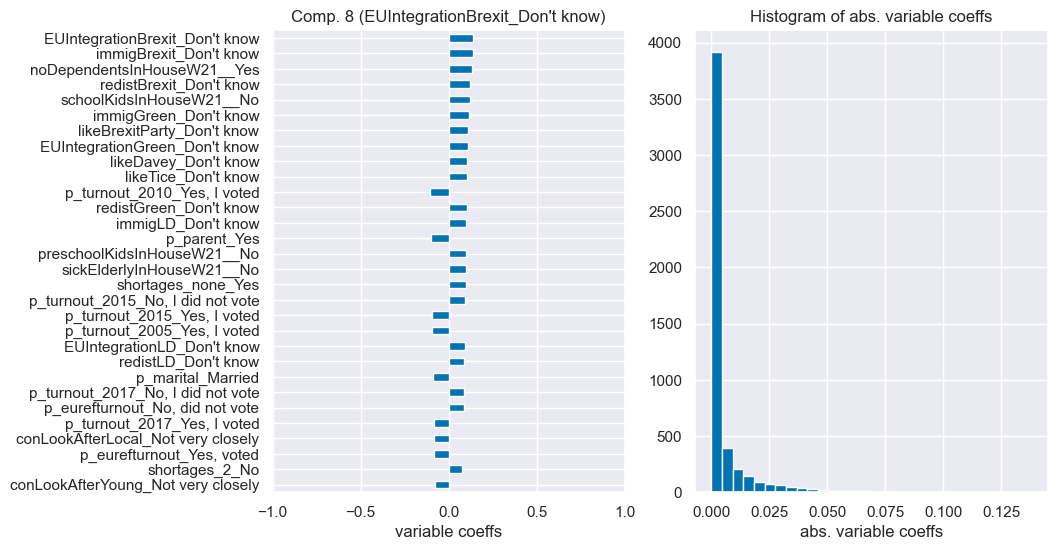

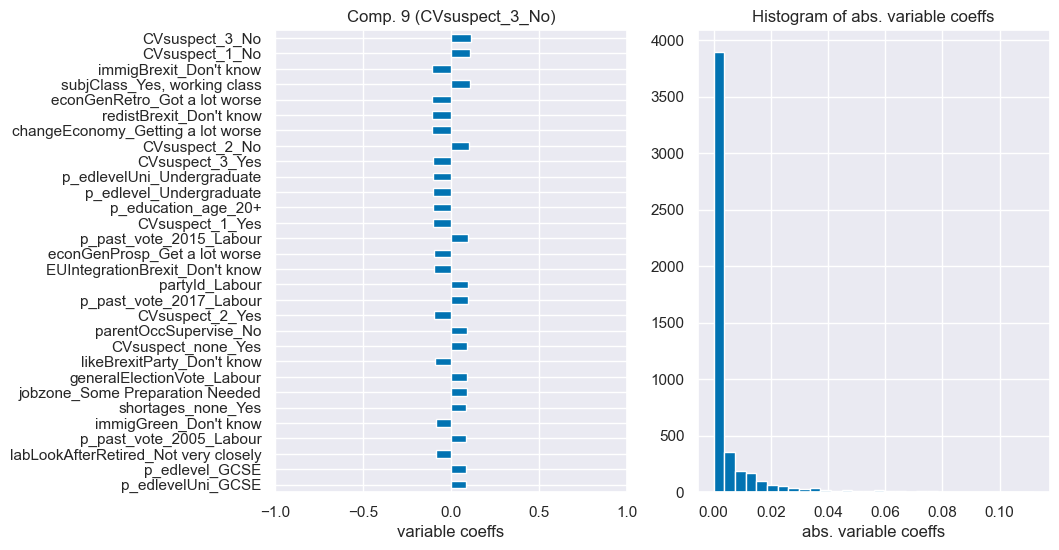

In [6]:
%%time
from sklearn.decomposition import PCA, FactorAnalysis

n_components = 10

decomp = PCA(svd_solver="full",n_components =n_components )
# decomp = FactorAnalysis(n_components =n_components )

decomp.fit(BES_num)
BES_decomp = decomp.transform(BES_num)
# BES_decomp  = pd.DataFrame(BES_decomp,index=BES_num.index)
cols = BES_num.columns
(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp, cols, BES_decomp,
                                                          show_first_x_comps=n_components);

In [7]:
# W23
# (preschoolKids|schoolKids|sickElderly|noDependents)InHouseW21_
# localElectionScotRank1-7
# vaccinated3 - extra slightly diff version of vaccinated question
# religImportant - How much difference would you say spiritual beliefs make to your life?
# partyContact - extra variables for independents
# smallEmergency2 - same as smallEmergency but adds "put on credit card, pay off over time"
# inheritMoney|inheritChangeCircs - are you likely to inherit money/prop in future / will it make a major change to your fin circs?
    # weird no "have you *already* inherited!"
# homeFinance - if needed, how much money could someone in your fam give/lend you for a purchase like a house?
# buyHouseYear - what year did you buy your house?
# homeOwn2 - homeOwn but has a "live rent free in fam member/friend's home" category
# EconSecurityFuture - econ circs in the next 10 years
# homenorm - to be considered a success in life, a person needs to own their own home by 40

# scotIndepRejoinEU - Scotland would be able to join EU (added to list of "an ind scot wd be able to ..." items)

# <party>LookAfter(Local|London|Young|Retired|Educated|NotEducated) - extended from con/lab to brx/snp/grn/ld
# <con|lab>LookAfter(Men|Women)
# partygate(Care|Anger)
# handleUkraine|handleUkraineLab
# (brexit|ukraine|pandemic|globalEconomy|ukGovt)EconImpact
# likeSlater
# southYorksFirstChoice ... bunch of mayoral elections!

In [17]:
BES_Panel["religImportant"].value_counts()

No difference          16446
A little difference     4762
Some difference         4512
A great difference      3097
Don't know              2132
Name: religImportant, dtype: int64

In [15]:
BES_Panel["churchAttendance"].value_counts(dropna=False).sort_index()

Never or practically never                    5964
Less often than once a year                   1654
Less often but at least once a year            998
Less often but at least twice a year           971
Less often but at least once a month           648
Less often but at least once in two weeks      522
Once a week or more                           1818
Varies too much to say                         862
I am not religious                           16341
Don't know                                    1171
Name: churchAttendance, dtype: int64

In [17]:
BES_num.drop(search(BES_num,"churchAttendance").index,axis=1,inplace=True,errors='ignore')

churchAttendanceFrequency = BES_Panel["churchAttendance"].cat.codes.replace(-1,np.nan)
churchAttendanceFrequency[churchAttendanceFrequency>6] = np.nan
BES_num["churchAttendanceFrequency"] = churchAttendanceFrequency.loc[BES_num.index]
BES_num["churchAttendanceNotReligious"] = (BES_Panel["churchAttendance"].loc[BES_num.index]=="I am not religious").astype('float')
BES_num["churchAttendanceVariesTooMuch"] = (BES_Panel["churchAttendance"].loc[BES_num.index]=="Varies too much to say").astype('float')

In [18]:
BES_num["religImportant"].value_counts()

0.0    13773
1.0     4065
2.0     3849
3.0     2596
Name: religImportant, dtype: int64

In [9]:
pd.Series(df.index).value_counts().index[0]

'churchAttendance_Less often but at least once a[...]'

Top 20 positive (spearman) correlations for religImportant r p N 
 
 churchAttendanceFrequency 
 0.560000 
 0.00 
 10352 
 
 
 p_religion_Yes - Church of[...] 
 0.170000 
 0.00 
 24283 
 
 
 churchAttendanceVariesTooMuch 
 0.160000 
 0.00 
 24283 
 
 
 p_religion_Yes - Roman Catholic 
 0.160000 
 0.00 
 24283 
 
 
 p_religion_Yes - Other 
 0.160000 
 0.00 
 24283 
 
 
 p_religion_Yes - Evangelical â independent/non-[...] 
 0.160000 
 0.00 
 24283 
 
 
 p_religion_Yes - Islam 
 0.140000 
 0.00 
 24283 
 
 
 p_religion_Yes - Baptist 
 0.120000 
 0.00 
 24283 
 
 
 p_religion_Yes - Pentecostal (e.g. Assemblies of[...] 
 0.120000 
 0.00 
 24283 
 
 
 gender_Female 
 0.110000 
 0.00 
 24283 
 
 
 al4_Strongly agree 
 0.100000 
 0.00 
 24283 
 
 
 p_religion_Yes - Methodist 
 0.090000 
 0.00 
 24283 
 
 
 p_ethnicity_Pakistani 
 0.080000 
 0.00 
 24283 
 
 
 p_country_birth_Africa 
 0.080000 
 0.00 
 24283 
 
 
 p_ethnicity_Indian 
 0.080000 
 0.00 
 24283 
 
 
 p_ethnicity_Black African 
 0.080000 
 0.00 
 24283 
 
 
 al4_Agree 
 0.080000 
 0.00 
 24283 
 
 
 coronaDied2_Yes 
 0.080000 
 0.00 
 24283 
 
 
 p_religion_Yes - Hinduism 
 0.070000 
 0.00 
 24283 
 
 
 euID6_Agree 
 0.070000 
 0.00 
 24283 
 
 Top 20 negative (spearman) correlations for religImportant r p N 
 
 churchAttendanceNotReligious 
 -0.510000 
 0.00 
 24283 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.460000 
 0.00 
 24283 
 
 
 p_ethnicity_White British 
 -0.130000 
 0.00 
 24283 
 
 
 gender_Male 
 -0.110000 
 0.00 
 24283 
 
 
 p_country_birth_UK 
 -0.090000 
 0.00 
 24283 
 
 
 sector_Private sector firm of company Including,[...] 
 -0.090000 
 0.00 
 24283 
 
 
 coronaDied2_No 
 -0.090000 
 0.00 
 24283 
 
 
 p_marital_Living with a partner but neither[...] 
 -0.080000 
 0.00 
 24283 
 
 
 p_job_sector_Private sector â profit-seeking[...] 
 -0.080000 
 0.00 
 24283 
 
 
 al4_Strongly disagree 
 -0.080000 
 0.00 
 24283 
 
 
 al4_Disagree 
 -0.080000 
 0.00 
 24283 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 -0.070000 
 0.00 
 24283 
 
 
 p_disability_No 
 -0.070000 
 0.00 
 24283 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 -0.070000 
 0.00 
 24283 
 
 
 p_paper_read_None 
 -0.070000 
 0.00 
 24283 
 
 
 selfOccStatus_An employee 
 -0.070000 
 0.00 
 24283 
 
 
 partyContact1_No 
 -0.060000 
 0.00 
 24283 
 
 
 selfOccSupervise_No 
 -0.060000 
 0.00 
 24283 
 
 
 vaccinated3_Yes, three or more doses (a[...] 
 -0.060000 
 0.00 
 24283 
 
 
 parentEducation_Don't know 
 -0.060000 
 0.00 
 24283

MSE: 0.58, MAE: 0.57, EV: 0.48, R2: 0.48


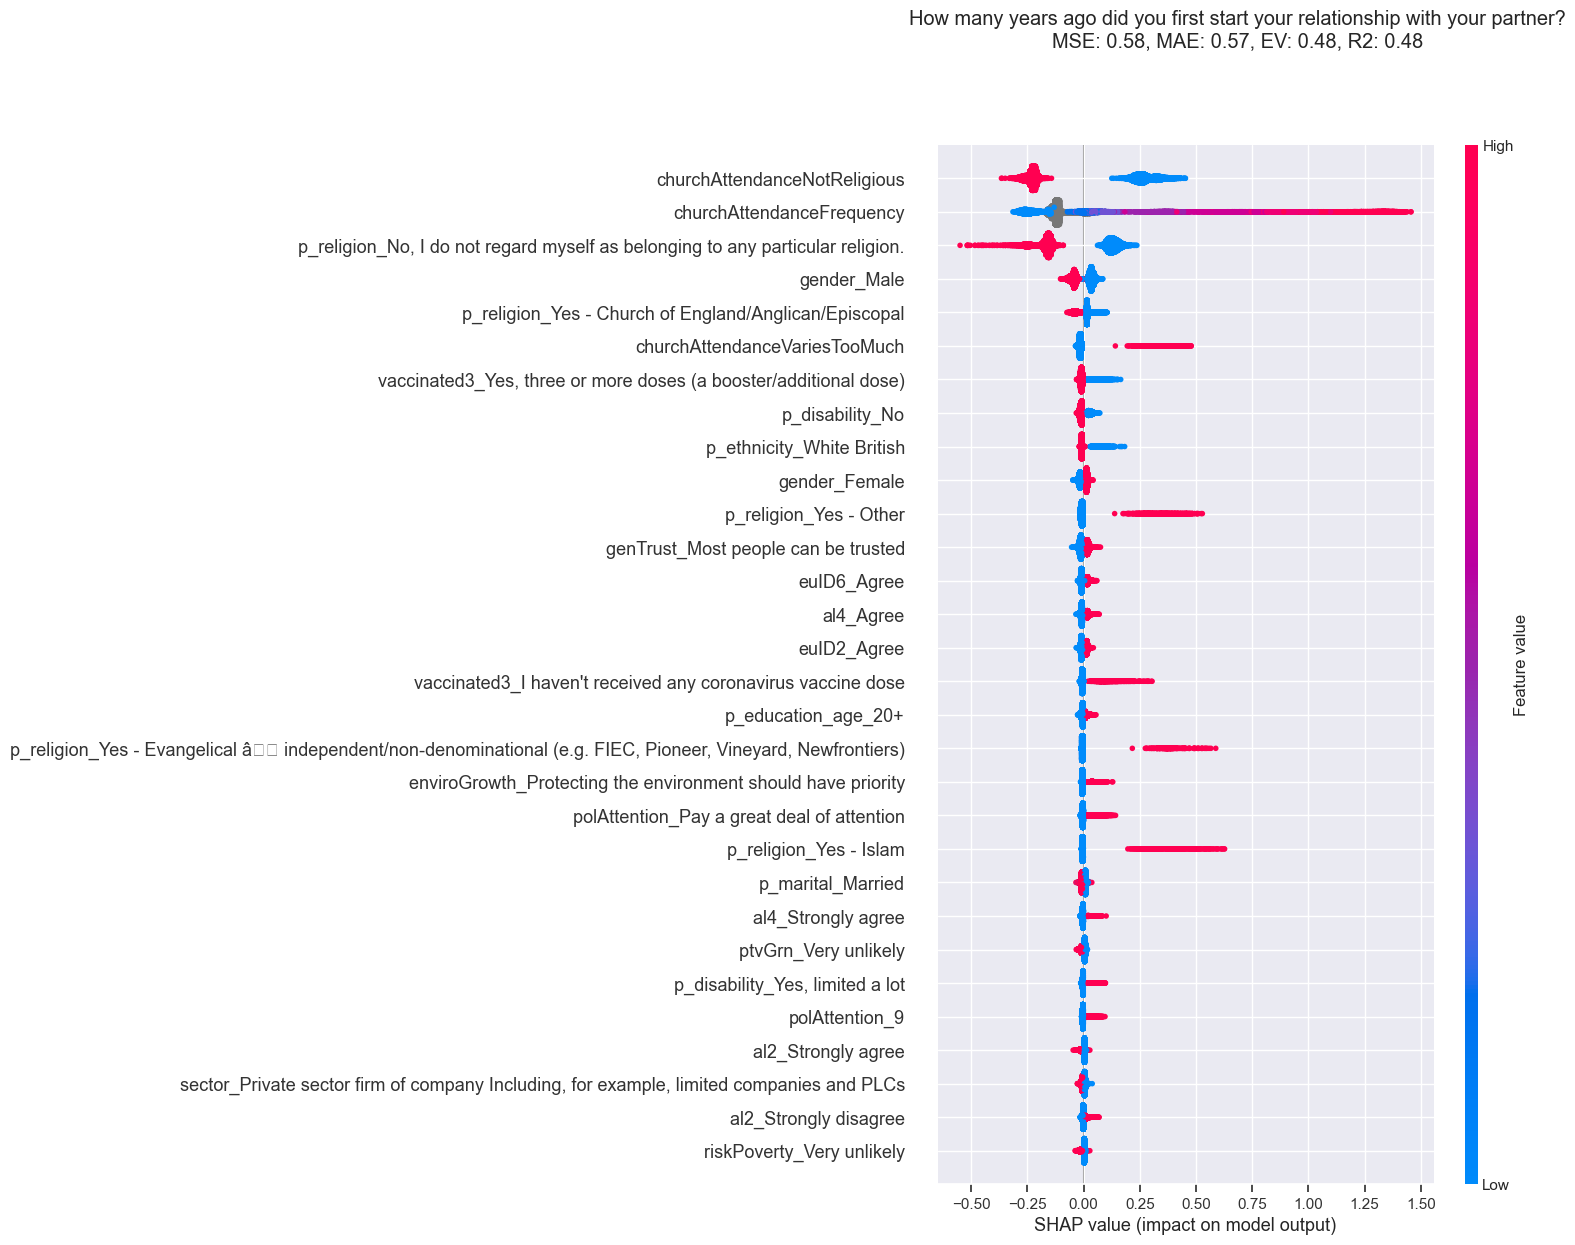

In [18]:
# religImportant
name="religImportant"
pattern=name

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name,pattern=pattern)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name,pattern],verbosity=0)

Top 20 positive (spearman) correlations for inheritMoney r p N 
 
 inheritChangeCircs_Yes 
 0.680000 
 0.00 
 22241 
 
 
 inheritChangeCircs_No 
 0.480000 
 0.00 
 22241 
 
 
 inheritChangeCircs_Don't know 
 0.310000 
 0.00 
 22241 
 
 
 selfOccStatus_An employee 
 0.280000 
 0.00 
 22241 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 0.260000 
 0.00 
 22241 
 
 
 homeOwn2_I own it with a mortgage 
 0.260000 
 0.00 
 22241 
 
 
 p_housing_Own â with a mortgage 
 0.250000 
 0.00 
 22241 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 0.250000 
 0.00 
 22241 
 
 
 riskUnemployment_Fairly unlikely 
 0.190000 
 0.00 
 22241 
 
 
 p_job_sector_Private sector â profit-seeking[...] 
 0.180000 
 0.00 
 22241 
 
 
 selfOccSupervise_No 
 0.170000 
 0.00 
 22241 
 
 
 selfOccSupervise_Yes 
 0.170000 
 0.00 
 22241 
 
 
 ageGroup_36-45 
 0.160000 
 0.00 
 22241 
 
 
 selfOccOrgSize_500 or more employees 
 0.160000 
 0.00 
 22241 
 
 
 ageGroup_46-55 
 0.150000 
 0.00 
 22241 
 
 
 homeFinance_Â£10,000-Â£24,999 
 0.150000 
 0.00 
 22241 
 
 
 p_education_age_20+ 
 0.150000 
 0.00 
 22241 
 
 
 p_hh_size_4 
 0.140000 
 0.00 
 22241 
 
 
 selfOccOrgSize_25 to 499 employees 
 0.140000 
 0.00 
 22241 
 
 
 p_job_sector_Public sector â government owned or[...] 
 0.140000 
 0.00 
 22241 
 
 Top 20 negative (spearman) correlations for inheritMoney r p N 
 
 ageGroup_66+ 
 -0.370000 
 0.00 
 22241 
 
 
 workingStatus_Retired 
 -0.330000 
 0.00 
 22241 
 
 
 p_work_stat_Retired 
 -0.330000 
 0.00 
 22241 
 
 
 homeFinance_No one in my family could lend me[...] 
 -0.320000 
 0.00 
 22241 
 
 
 prevJob_Yes 
 -0.320000 
 0.00 
 22241 
 
 
 p_job_sector_Not applicable 
 -0.310000 
 0.00 
 22241 
 
 
 selfOccStatusLast_An employee 
 -0.280000 
 0.00 
 22241 
 
 
 p_housing_Own â outright 
 -0.220000 
 0.00 
 22241 
 
 
 homeOwn2_I own it outright 
 -0.210000 
 0.00 
 22241 
 
 
 selfOccSuperviseLast_Yes 
 -0.200000 
 0.00 
 22241 
 
 
 p_hh_children_0 
 -0.170000 
 0.00 
 22241 
 
 
 p_education_age_15 or under 
 -0.160000 
 0.00 
 22241 
 
 
 selfOccSuperviseLast_No 
 -0.150000 
 0.00 
 22241 
 
 
 p_socgrade_E 
 -0.140000 
 0.00 
 22241 
 
 
 selfOccOrgSizeLast_25 to 499 employees 
 -0.140000 
 0.00 
 22241 
 
 
 conLookAfterRetired_Not at all closely 
 -0.130000 
 0.00 
 22241 
 
 
 englishness_Very strongly English 
 -0.130000 
 0.00 
 22241 
 
 
 selfOccOrgSizeLast_1 to 24 employees 
 -0.130000 
 0.00 
 22241 
 
 
 p_eurefvote_I voted to leave 
 -0.130000 
 0.00 
 22241 
 
 
 EconSecurityFuture_A lot worse 
 -0.130000 
 0.00 
 22241

MSE: 0.00, MAE: 0.01, EV: 1.00, R2: 1.00


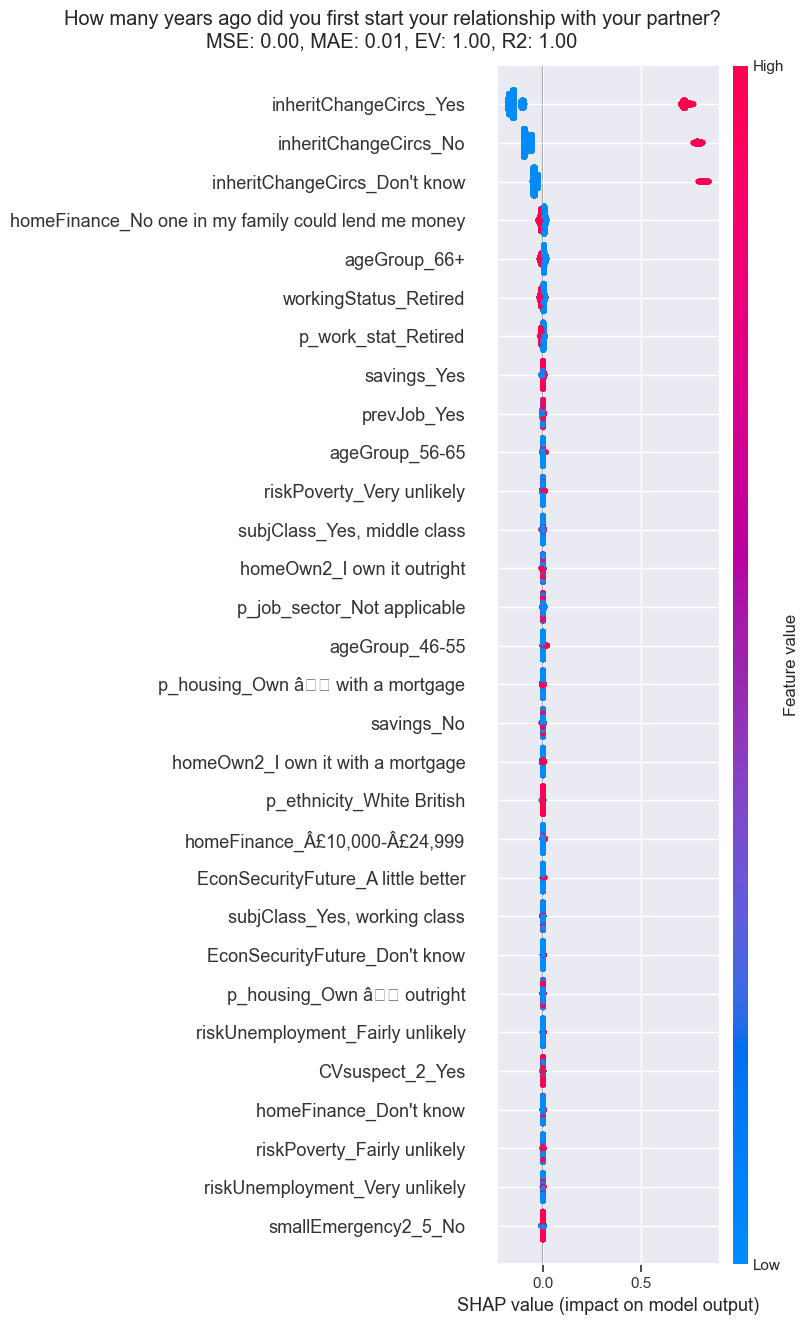

In [9]:
# inheritMoney
name="inheritMoney"
pattern = "inherit"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for inheritChangeCircs r p N 
 
 borrowEssentials_Yes 
 0.110000 
 0.00 
 6058 
 
 
 smallEmergency2_1_No 
 0.100000 
 0.00 
 6058 
 
 
 ageGroup_36-45 
 0.100000 
 0.00 
 6058 
 
 
 ageGroup_26-35 
 0.100000 
 0.00 
 6058 
 
 
 selfOccSupervise_No 
 0.090000 
 0.00 
 6058 
 
 
 selfOccStatus_An employee 
 0.090000 
 0.00 
 6058 
 
 
 homeOwn2_I rent it from a private landlord 
 0.090000 
 0.00 
 6058 
 
 
 smallEmergency2_4_Yes 
 0.090000 
 0.00 
 6058 
 
 
 savings_No 
 0.090000 
 0.00 
 6058 
 
 
 homeOwn2_I own it with a mortgage 
 0.090000 
 0.00 
 6058 
 
 
 p_housing_Own â with a mortgage 
 0.080000 
 0.00 
 6058 
 
 
 buyHomeFuture_Yes, I will be able to buy with a[...] 
 0.080000 
 0.00 
 6058 
 
 
 ptvLD_Don't know 
 0.080000 
 0.00 
 6058 
 
 
 likeDavey_Don't know 
 0.080000 
 0.00 
 6058 
 
 
 smallEmergency2_6_Yes 
 0.080000 
 0.00 
 6058 
 
 
 conLookAfterLocal_Don't know 
 0.070000 
 0.00 
 6058 
 
 
 effectsRemainFinance_Don't know 
 0.070000 
 0.00 
 6058 
 
 
 likeBrexitParty_Don't know 
 0.070000 
 0.00 
 6058 
 
 
 EUIntegrationCon_Don't know 
 0.070000 
 0.00 
 6058 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 0.070000 
 0.00 
 6058 
 
 Top 20 negative (spearman) correlations for inheritChangeCircs r p N 
 
 homeOwn2_I own it outright 
 -0.230000 
 0.00 
 6058 
 
 
 p_housing_Own â outright 
 -0.220000 
 0.00 
 6058 
 
 
 p_work_stat_Retired 
 -0.190000 
 0.00 
 6058 
 
 
 workingStatus_Retired 
 -0.190000 
 0.00 
 6058 
 
 
 ageGroup_66+ 
 -0.170000 
 0.00 
 6058 
 
 
 savingsAmtb_Â£200,000 or above 
 -0.160000 
 0.00 
 6058 
 
 
 riskPoverty_Very unlikely 
 -0.130000 
 0.00 
 6058 
 
 
 prevJob_Yes 
 -0.130000 
 0.00 
 6058 
 
 
 selfOccStatusLast_An employee 
 -0.120000 
 0.00 
 6058 
 
 
 selfOccSuperviseLast_Yes 
 -0.120000 
 0.00 
 6058 
 
 
 borrowEssentials_No 
 -0.110000 
 0.00 
 6058 
 
 
 p_turnout_2005_Yes, I voted 
 -0.110000 
 0.00 
 6058 
 
 
 p_hh_size_2 
 -0.100000 
 0.00 
 6058 
 
 
 ageGroup_56-65 
 -0.100000 
 0.00 
 6058 
 
 
 smallEmergency2_1_Yes 
 -0.100000 
 0.00 
 6058 
 
 
 p_marital_Married 
 -0.090000 
 0.00 
 6058 
 
 
 savings_Yes 
 -0.090000 
 0.00 
 6058 
 
 
 smallEmergency2_6_No 
 -0.090000 
 0.00 
 6058 
 
 
 smallEmergency2_4_No 
 -0.090000 
 0.00 
 6058 
 
 
 p_hh_children_0 
 -0.090000 
 0.00 
 6058

MSE: 0.21, MAE: 0.41, EV: 0.08, R2: 0.08


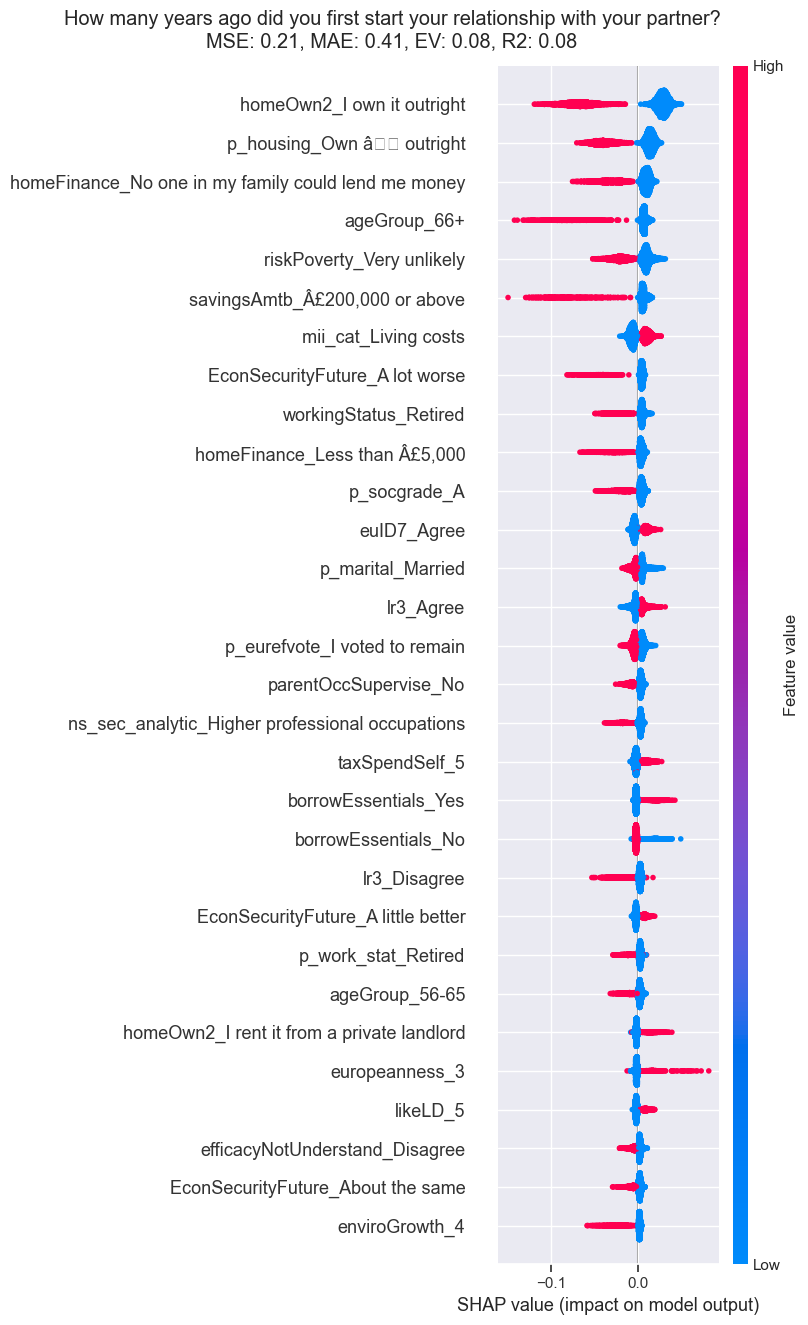

In [10]:
# inheritChangeCircs
name="inheritChangeCircs"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for homeFinance r p N 
 
 inheritMoney 
 0.410000 
 0.00 
 16948 
 
 
 inheritMoney_Yes 
 0.380000 
 0.00 
 19000 
 
 
 inheritChangeCircs_Yes 
 0.300000 
 0.00 
 19000 
 
 
 subjClass_Yes, middle class 
 0.200000 
 0.00 
 19000 
 
 
 homeOwn2_I own it with a mortgage 
 0.170000 
 0.00 
 19000 
 
 
 p_work_stat_Working full time (30 or more hours[...] 
 0.170000 
 0.00 
 19000 
 
 
 savings_Yes 
 0.170000 
 0.00 
 19000 
 
 
 selfOccStatus_An employee 
 0.170000 
 0.00 
 19000 
 
 
 p_education_age_20+ 
 0.170000 
 0.00 
 19000 
 
 
 p_housing_Own â with a mortgage 
 0.170000 
 0.00 
 19000 
 
 
 workingStatus_Working full time (30 or more hours[...] 
 0.170000 
 0.00 
 19000 
 
 
 smallEmergency2_5_No 
 0.150000 
 0.00 
 19000 
 
 
 inheritChangeCircs_No 
 0.150000 
 0.00 
 19000 
 
 
 selfOccSupervise_Yes 
 0.140000 
 0.00 
 19000 
 
 
 smallEmergency2_1_Yes 
 0.140000 
 0.00 
 19000 
 
 
 EconSecurityFuture_A little better 
 0.130000 
 0.00 
 19000 
 
 
 riskPoverty_Very unlikely 
 0.130000 
 0.00 
 19000 
 
 
 p_gross_household_Â£70,000 to Â£99,999 per year 
 0.130000 
 0.00 
 19000 
 
 
 conLookAfterRetired_Very closely 
 0.130000 
 0.00 
 19000 
 
 
 ageGroup_18-25 
 0.130000 
 0.00 
 19000 
 
 Top 20 negative (spearman) correlations for homeFinance r p N 
 
 inheritMoney_No 
 -0.350000 
 0.00 
 19000 
 
 
 prevJob_Yes 
 -0.230000 
 0.00 
 19000 
 
 
 selfOccStatusLast_An employee 
 -0.220000 
 0.00 
 19000 
 
 
 p_job_sector_Not applicable 
 -0.210000 
 0.00 
 19000 
 
 
 econPersonalProsp_Get a lot worse 
 -0.190000 
 0.00 
 19000 
 
 
 ageGroup_66+ 
 -0.180000 
 0.00 
 19000 
 
 
 savings_No 
 -0.180000 
 0.00 
 19000 
 
 
 workingStatus_Retired 
 -0.180000 
 0.00 
 19000 
 
 
 p_work_stat_Retired 
 -0.180000 
 0.00 
 19000 
 
 
 econPersonalRetro_Got a lot worse 
 -0.160000 
 0.00 
 19000 
 
 
 smallEmergency2_5_Yes 
 -0.160000 
 0.00 
 19000 
 
 
 selfOccSuperviseLast_No 
 -0.160000 
 0.00 
 19000 
 
 
 p_socgrade_E 
 -0.150000 
 0.00 
 19000 
 
 
 EconSecurityFuture_A lot worse 
 -0.150000 
 0.00 
 19000 
 
 
 conLookAfterRetired_Not at all closely 
 -0.140000 
 0.00 
 19000 
 
 
 p_hh_children_0 
 -0.130000 
 0.00 
 19000 
 
 
 smallEmergency2_1_No 
 -0.130000 
 0.00 
 19000 
 
 
 englishness_Very strongly English 
 -0.130000 
 0.00 
 19000 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.130000 
 0.00 
 19000 
 
 
 buyHomeFuture_No, I will not be able to purchase a[...] 
 -0.130000 
 0.00 
 19000

MSE: 3.22, MAE: 1.21, EV: 0.25, R2: 0.25


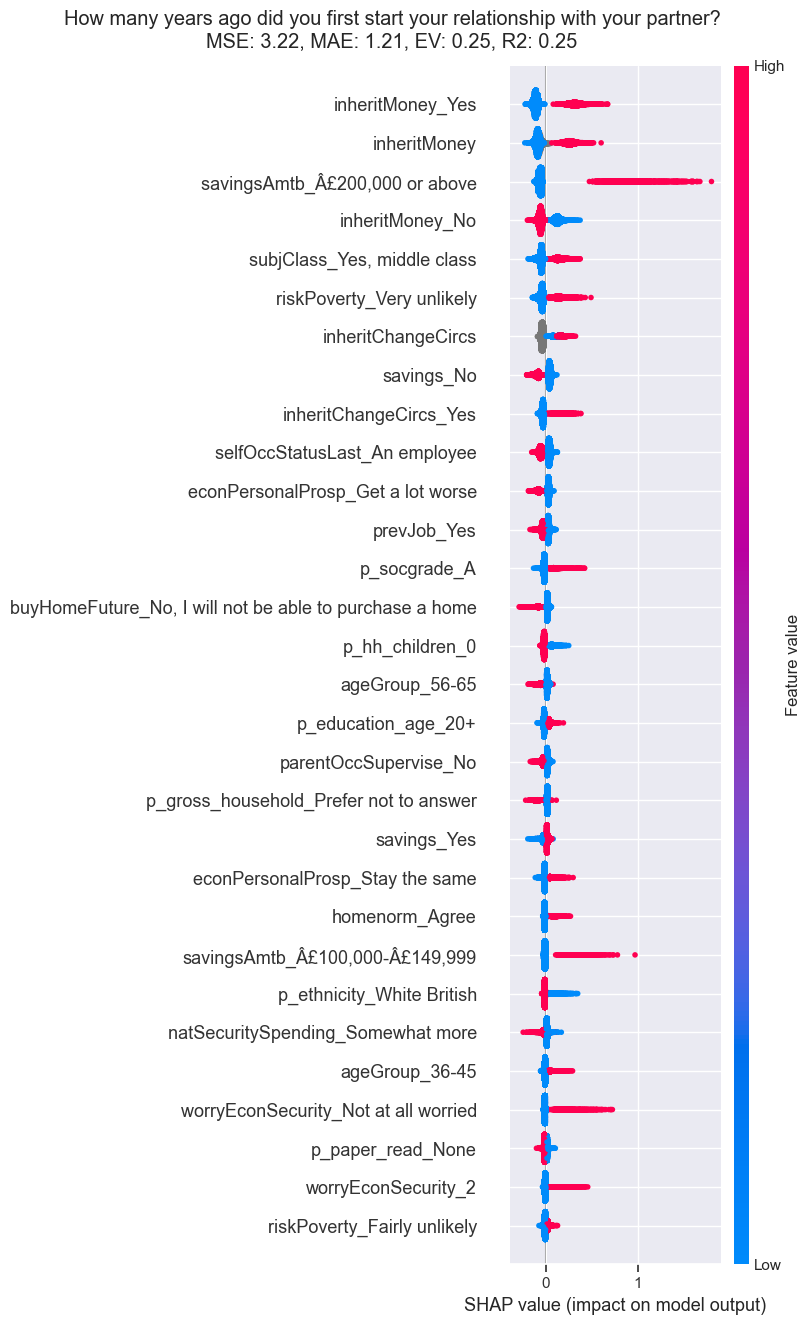

In [11]:
# homeFinance
name="homeFinance"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for homenorm r p N 
 
 partyId_Conservative 
 0.150000 
 0.00 
 24208 
 
 
 p_past_vote_2019_Conservative 
 0.130000 
 0.00 
 24208 
 
 
 p_past_vote_2017_Conservative 
 0.120000 
 0.00 
 24208 
 
 
 generalElectionVote_Conservative 
 0.120000 
 0.00 
 24208 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.110000 
 0.00 
 24208 
 
 
 bestOnMII_Conservative 
 0.110000 
 0.00 
 24208 
 
 
 femaleEquality_About right 
 0.110000 
 0.00 
 24208 
 
 
 euID_The leave side 
 0.110000 
 0.00 
 24208 
 
 
 p_past_vote_2015_Conservative 
 0.110000 
 0.00 
 24208 
 
 
 p_past_vote_2005_Conservative 
 0.100000 
 0.00 
 24208 
 
 
 conLookAfterBA_Fairly closely 
 0.100000 
 0.00 
 24208 
 
 
 conLookAfterWC_Fairly closely 
 0.100000 
 0.00 
 24208 
 
 
 conLookAfterYoung_Fairly closely 
 0.100000 
 0.00 
 24208 
 
 
 p_housing_Own â outright 
 0.100000 
 0.00 
 24208 
 
 
 homeOwn2_I own it outright 
 0.100000 
 0.00 
 24208 
 
 
 ptvCon_Very likely 
 0.090000 
 0.00 
 24208 
 
 
 p_eurefvote_I voted to leave 
 0.090000 
 0.00 
 24208 
 
 
 al3_Agree 
 0.090000 
 0.00 
 24208 
 
 
 blackEquality_About right 
 0.090000 
 0.00 
 24208 
 
 
 conLookAfterUnemp_Fairly closely 
 0.090000 
 0.00 
 24208 
 
 Top 20 negative (spearman) correlations for homenorm r p N 
 
 ptvCon_Very unlikely 
 -0.180000 
 0.00 
 24208 
 
 
 al2_Strongly disagree 
 -0.180000 
 0.00 
 24208 
 
 
 al1_Strongly disagree 
 -0.170000 
 0.00 
 24208 
 
 
 blackEquality_Not gone nearly far enough 
 -0.160000 
 0.00 
 24208 
 
 
 likeCon_Strongly dislike 
 -0.160000 
 0.00 
 24208 
 
 
 conLookAfterUnemp_Not at all closely 
 -0.160000 
 0.00 
 24208 
 
 
 partygateCare_Strongly disagree 
 -0.150000 
 0.00 
 24208 
 
 
 likeJohnson_Strongly dislike 
 -0.150000 
 0.00 
 24208 
 
 
 gayEquality_Not gone nearly far enough 
 -0.150000 
 0.00 
 24208 
 
 
 al3_Strongly disagree 
 -0.140000 
 0.00 
 24208 
 
 
 conLookAfterBA_Not at all closely 
 -0.140000 
 0.00 
 24208 
 
 
 femaleEquality_Not gone nearly far enough 
 -0.130000 
 0.00 
 24208 
 
 
 p_past_vote_2019_Labour 
 -0.130000 
 0.00 
 24208 
 
 
 keepNukes_Strongly disagree 
 -0.130000 
 0.00 
 24208 
 
 
 immigEcon_Good for economy 
 -0.130000 
 0.00 
 24208 
 
 
 redistCon_Government should be less concerned[...] 
 -0.130000 
 0.00 
 24208 
 
 
 conLookAfterYoung_Not at all closely 
 -0.130000 
 0.00 
 24208 
 
 
 handleCorona_Very badly 
 -0.130000 
 0.00 
 24208 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.120000 
 0.00 
 24208 
 
 
 al5_Strongly disagree 
 -0.120000 
 0.00 
 24208

MSE: 0.93, MAE: 0.78, EV: 0.15, R2: 0.15


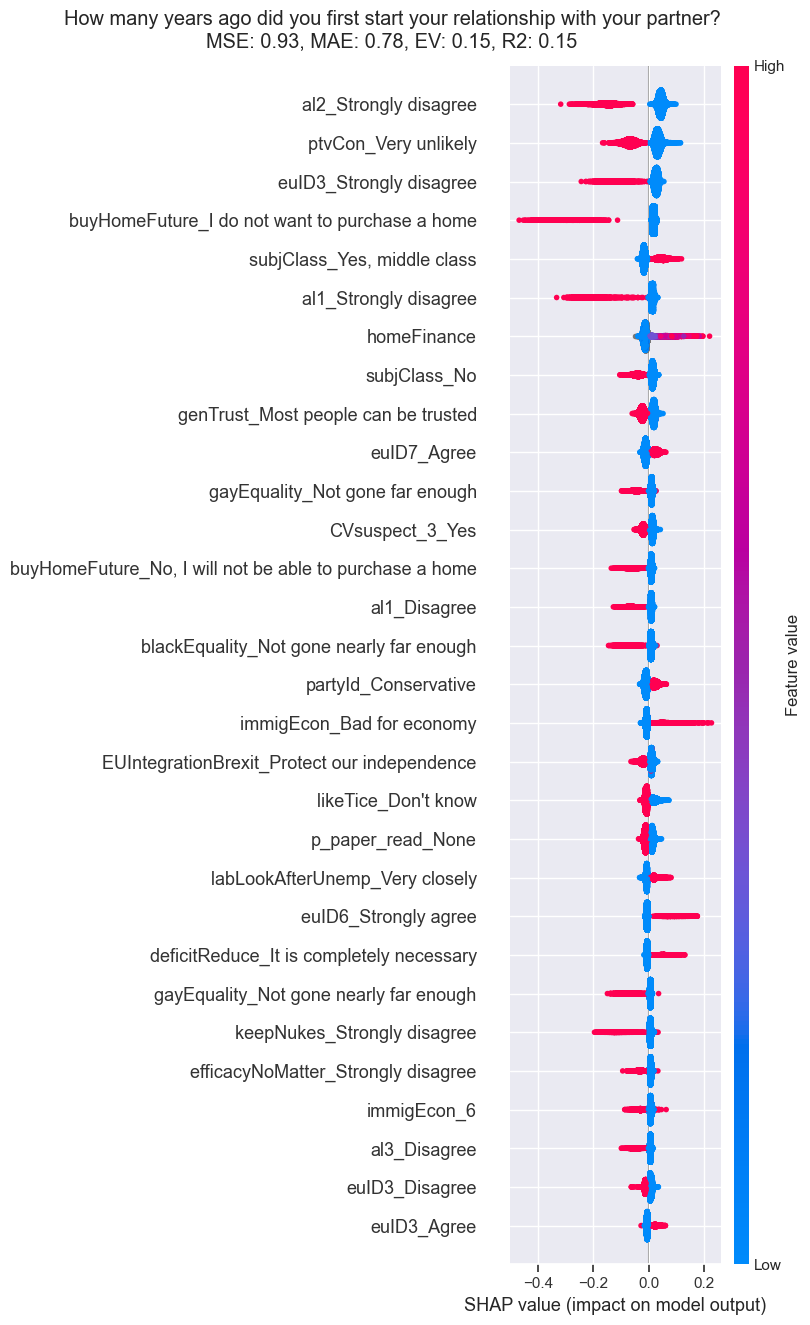

In [12]:
# homenorm
name="homenorm"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for partygateCare r p N 
 
 generalElectionVote_Conservative 
 0.540000 
 0.00 
 25228 
 
 
 p_past_vote_2019_Conservative 
 0.480000 
 0.00 
 25228 
 
 
 partyId_Conservative 
 0.470000 
 0.00 
 25228 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.440000 
 0.00 
 25228 
 
 
 ptvCon_Very likely 
 0.440000 
 0.00 
 25228 
 
 
 p_past_vote_2017_Conservative 
 0.430000 
 0.00 
 25228 
 
 
 bestOnMII_Conservative 
 0.430000 
 0.00 
 25228 
 
 
 euID_The leave side 
 0.410000 
 0.00 
 25228 
 
 
 handleUkraine_Very well 
 0.380000 
 0.00 
 25228 
 
 
 handleCorona_Quite well 
 0.380000 
 0.00 
 25228 
 
 
 partygateAnger_Disagree 
 0.360000 
 0.00 
 25228 
 
 
 partygateAnger_Strongly disagree 
 0.360000 
 0.00 
 25228 
 
 
 ptvLab_Very unlikely 
 0.360000 
 0.00 
 25228 
 
 
 conLookAfterWC_Fairly closely 
 0.350000 
 0.00 
 25228 
 
 
 EUIntegrationSelf_Protect our independence 
 0.350000 
 0.00 
 25228 
 
 
 conLookAfterUnemp_Fairly closely 
 0.340000 
 0.00 
 25228 
 
 
 conLookAfterBA_Fairly closely 
 0.330000 
 0.00 
 25228 
 
 
 p_eurefvote_I voted to leave 
 0.330000 
 0.00 
 25228 
 
 
 conLookAfterYoung_Fairly closely 
 0.320000 
 0.00 
 25228 
 
 
 p_past_vote_2015_Conservative 
 0.320000 
 0.00 
 25228 
 
 Top 20 negative (spearman) correlations for partygateCare r p N 
 
 partygateAnger_Strongly agree 
 -0.650000 
 0.00 
 25228 
 
 
 likeJohnson_Strongly dislike 
 -0.560000 
 0.00 
 25228 
 
 
 ptvCon_Very unlikely 
 -0.520000 
 0.00 
 25228 
 
 
 likeCon_Strongly dislike 
 -0.510000 
 0.00 
 25228 
 
 
 conLookAfterUnemp_Not at all closely 
 -0.460000 
 0.00 
 25228 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.440000 
 0.00 
 25228 
 
 
 generalElectionVote_Labour 
 -0.420000 
 0.00 
 25228 
 
 
 handleCorona_Very badly 
 -0.410000 
 0.00 
 25228 
 
 
 euID_The remain side 
 -0.410000 
 0.00 
 25228 
 
 
 conLookAfterBA_Not at all closely 
 -0.380000 
 0.00 
 25228 
 
 
 conLookAfterWC_Not at all closely 
 -0.380000 
 0.00 
 25228 
 
 
 p_past_vote_2019_Labour 
 -0.380000 
 0.00 
 25228 
 
 
 lr4_Strongly agree 
 -0.370000 
 0.00 
 25228 
 
 
 bestOnMII_Labour 
 -0.370000 
 0.00 
 25228 
 
 
 partyId_Labour 
 -0.350000 
 0.00 
 25228 
 
 
 p_past_vote_2017_Labour 
 -0.350000 
 0.00 
 25228 
 
 
 conLookAfterYoung_Not at all closely 
 -0.340000 
 0.00 
 25228 
 
 
 conLookAfterNoEducated_Not at all closely 
 -0.330000 
 0.00 
 25228 
 
 
 ptvLab_Very likely 
 -0.330000 
 0.00 
 25228 
 
 
 changeEconomy_Getting a lot worse 
 -0.330000 
 0.00 
 25228

MSE: 0.68, MAE: 0.59, EV: 0.69, R2: 0.69


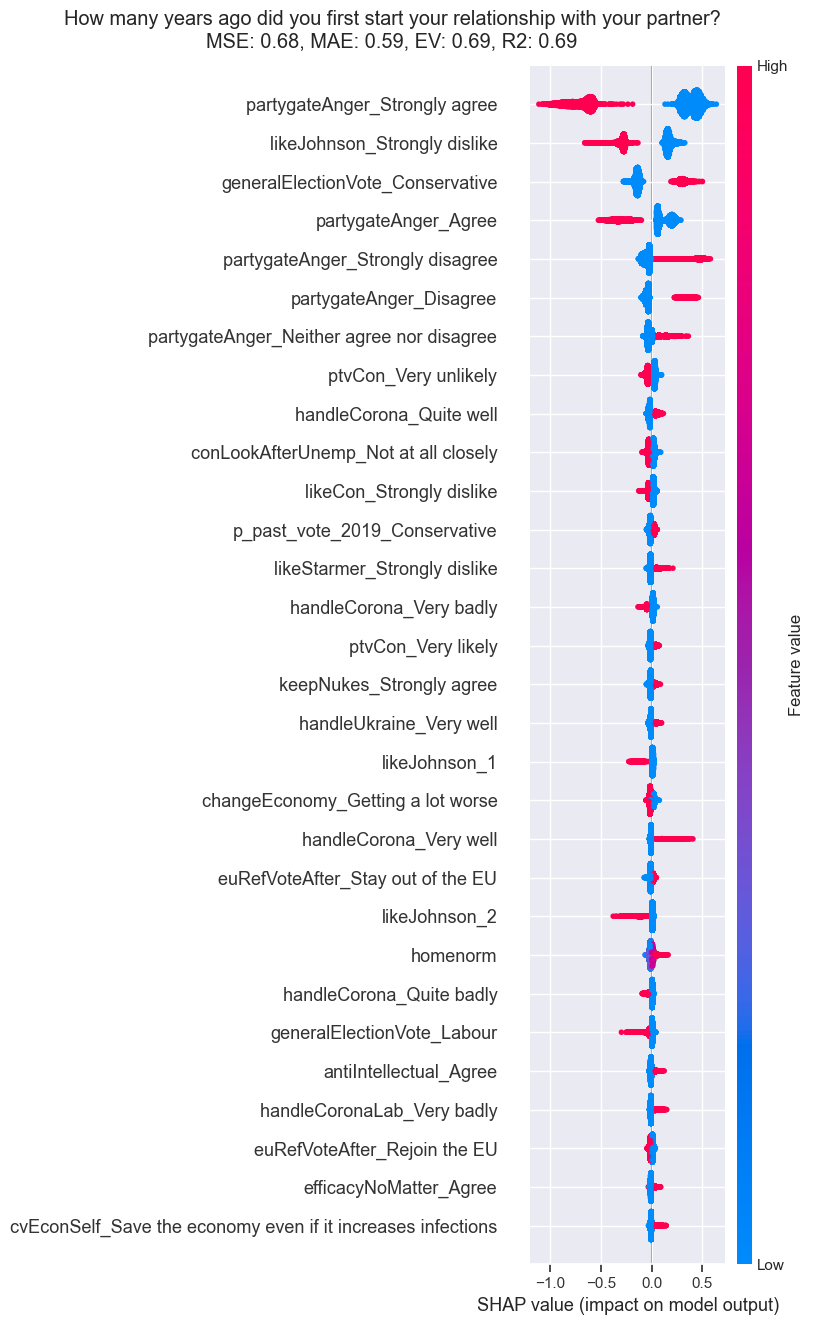

In [13]:
# partygateCare
name="partygateCare"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for partygateAnger r p N 
 
 partygateCare_Strongly disagree 
 0.620000 
 0.00 
 25334 
 
 
 likeJohnson_Strongly dislike 
 0.490000 
 0.00 
 25334 
 
 
 likeCon_Strongly dislike 
 0.460000 
 0.00 
 25334 
 
 
 ptvCon_Very unlikely 
 0.450000 
 0.00 
 25334 
 
 
 conLookAfterUnemp_Not at all closely 
 0.400000 
 0.00 
 25334 
 
 
 euRefVoteAfter_Rejoin the EU 
 0.390000 
 0.00 
 25334 
 
 
 generalElectionVote_Labour 
 0.380000 
 0.00 
 25334 
 
 
 handleCorona_Very badly 
 0.370000 
 0.00 
 25334 
 
 
 euID_The remain side 
 0.360000 
 0.00 
 25334 
 
 
 lr4_Strongly agree 
 0.360000 
 0.00 
 25334 
 
 
 conLookAfterWC_Not at all closely 
 0.340000 
 0.00 
 25334 
 
 
 conLookAfterBA_Not at all closely 
 0.340000 
 0.00 
 25334 
 
 
 p_past_vote_2019_Labour 
 0.340000 
 0.00 
 25334 
 
 
 bestOnMII_Labour 
 0.330000 
 0.00 
 25334 
 
 
 p_past_vote_2017_Labour 
 0.310000 
 0.00 
 25334 
 
 
 changeEconomy_Getting a lot worse 
 0.310000 
 0.00 
 25334 
 
 
 partyId_Labour 
 0.310000 
 0.00 
 25334 
 
 
 conLookAfterYoung_Not at all closely 
 0.300000 
 0.00 
 25334 
 
 
 conLookAfterNoEducated_Not at all closely 
 0.300000 
 0.00 
 25334 
 
 
 redistCon_Government should be less concerned[...] 
 0.290000 
 0.00 
 25334 
 
 Top 20 negative (spearman) correlations for partygateAnger r p N 
 
 partygateCare 
 -0.750000 
 0.00 
 25109 
 
 
 generalElectionVote_Conservative 
 -0.480000 
 0.00 
 25334 
 
 
 partygateCare_Strongly agree 
 -0.480000 
 0.00 
 25334 
 
 
 partyId_Conservative 
 -0.410000 
 0.00 
 25334 
 
 
 p_past_vote_2019_Conservative 
 -0.410000 
 0.00 
 25334 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.390000 
 0.00 
 25334 
 
 
 ptvCon_Very likely 
 -0.390000 
 0.00 
 25334 
 
 
 bestOnMII_Conservative 
 -0.380000 
 0.00 
 25334 
 
 
 p_past_vote_2017_Conservative 
 -0.360000 
 0.00 
 25334 
 
 
 euID_The leave side 
 -0.350000 
 0.00 
 25334 
 
 
 handleUkraine_Very well 
 -0.340000 
 0.00 
 25334 
 
 
 partygateCare_Agree 
 -0.330000 
 0.00 
 25334 
 
 
 ptvLab_Very unlikely 
 -0.330000 
 0.00 
 25334 
 
 
 handleCorona_Quite well 
 -0.320000 
 0.00 
 25334 
 
 
 conLookAfterWC_Fairly closely 
 -0.310000 
 0.00 
 25334 
 
 
 EUIntegrationSelf_Protect our independence 
 -0.310000 
 0.00 
 25334 
 
 
 conLookAfterUnemp_Fairly closely 
 -0.300000 
 0.00 
 25334 
 
 
 conLookAfterBA_Fairly closely 
 -0.290000 
 0.00 
 25334 
 
 
 p_eurefvote_I voted to leave 
 -0.290000 
 0.00 
 25334 
 
 
 handleCorona_Very well 
 -0.280000 
 0.00 
 25334

MSE: 0.75, MAE: 0.62, EV: 0.59, R2: 0.59


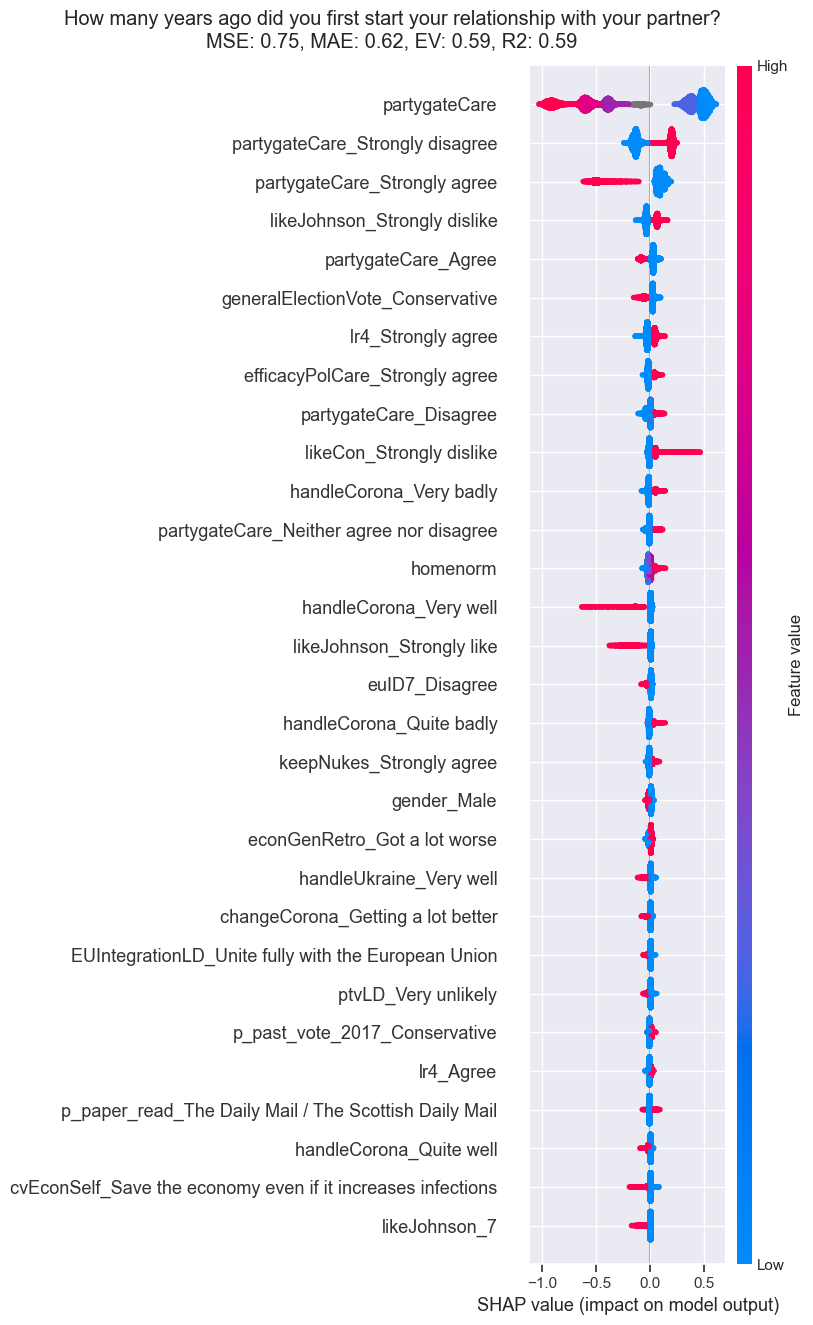

In [14]:
# partygateAnger
name="partygateAnger"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)

Top 20 positive (spearman) correlations for handleUkraine r p N 
 
 generalElectionVote_Conservative 
 0.470000 
 0.00 
 23900 
 
 
 partygateCare 
 0.450000 
 0.00 
 23551 
 
 
 partyId_Conservative 
 0.440000 
 0.00 
 23900 
 
 
 p_past_vote_2019_Conservative 
 0.430000 
 0.00 
 23900 
 
 
 bestOnMII_Conservative 
 0.410000 
 0.00 
 23900 
 
 
 ptvCon_Very likely 
 0.410000 
 0.00 
 23900 
 
 
 p_past_vote_2017_Conservative 
 0.410000 
 0.00 
 23900 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.390000 
 0.00 
 23900 
 
 
 handleCorona_Quite well 
 0.360000 
 0.00 
 23900 
 
 
 euID_The leave side 
 0.350000 
 0.00 
 23900 
 
 
 p_past_vote_2015_Conservative 
 0.330000 
 0.00 
 23900 
 
 
 conLookAfterWC_Fairly closely 
 0.320000 
 0.00 
 23900 
 
 
 partygateCare_Strongly agree 
 0.310000 
 0.00 
 23900 
 
 
 keepNukes_Strongly agree 
 0.310000 
 0.00 
 23900 
 
 
 handleCorona_Very well 
 0.310000 
 0.00 
 23900 
 
 
 conLookAfterBA_Fairly closely 
 0.300000 
 0.00 
 23900 
 
 
 conLookAfterYoung_Fairly closely 
 0.290000 
 0.00 
 23900 
 
 
 EUIntegrationSelf_Protect our independence 
 0.290000 
 0.00 
 23900 
 
 
 p_eurefvote_I voted to leave 
 0.290000 
 0.00 
 23900 
 
 
 conLookAfterUnemp_Fairly closely 
 0.290000 
 0.00 
 23900 
 
 Top 20 negative (spearman) correlations for handleUkraine r p N 
 
 likeJohnson_Strongly dislike 
 -0.450000 
 0.00 
 23900 
 
 
 likeCon_Strongly dislike 
 -0.440000 
 0.00 
 23900 
 
 
 ptvCon_Very unlikely 
 -0.430000 
 0.00 
 23900 
 
 
 handleCorona_Very badly 
 -0.420000 
 0.00 
 23900 
 
 
 partygateAnger 
 -0.410000 
 0.00 
 23620 
 
 
 partygateCare_Strongly disagree 
 -0.360000 
 0.00 
 23900 
 
 
 conLookAfterUnemp_Not at all closely 
 -0.350000 
 0.00 
 23900 
 
 
 partygateAnger_Strongly agree 
 -0.340000 
 0.00 
 23900 
 
 
 euRefVoteAfter_Rejoin the EU 
 -0.340000 
 0.00 
 23900 
 
 
 conLookAfterBA_Not at all closely 
 -0.340000 
 0.00 
 23900 
 
 
 conLookAfterWC_Not at all closely 
 -0.330000 
 0.00 
 23900 
 
 
 p_past_vote_2019_Labour 
 -0.320000 
 0.00 
 23900 
 
 
 euID_The remain side 
 -0.300000 
 0.00 
 23900 
 
 
 conLookAfterYoung_Not at all closely 
 -0.300000 
 0.00 
 23900 
 
 
 conLookAfterNoEducated_Not at all closely 
 -0.300000 
 0.00 
 23900 
 
 
 satDemUK_Very dissatisfied 
 -0.300000 
 0.00 
 23900 
 
 
 satDemEng_Very dissatisfied 
 -0.300000 
 0.00 
 23900 
 
 
 generalElectionVote_Labour 
 -0.300000 
 0.00 
 23900 
 
 
 conLookAfterLocal_Not at all closely 
 -0.290000 
 0.00 
 23900 
 
 
 p_past_vote_2017_Labour 
 -0.290000 
 0.00 
 23900

MSE: 0.64, MAE: 0.62, EV: 0.47, R2: 0.47


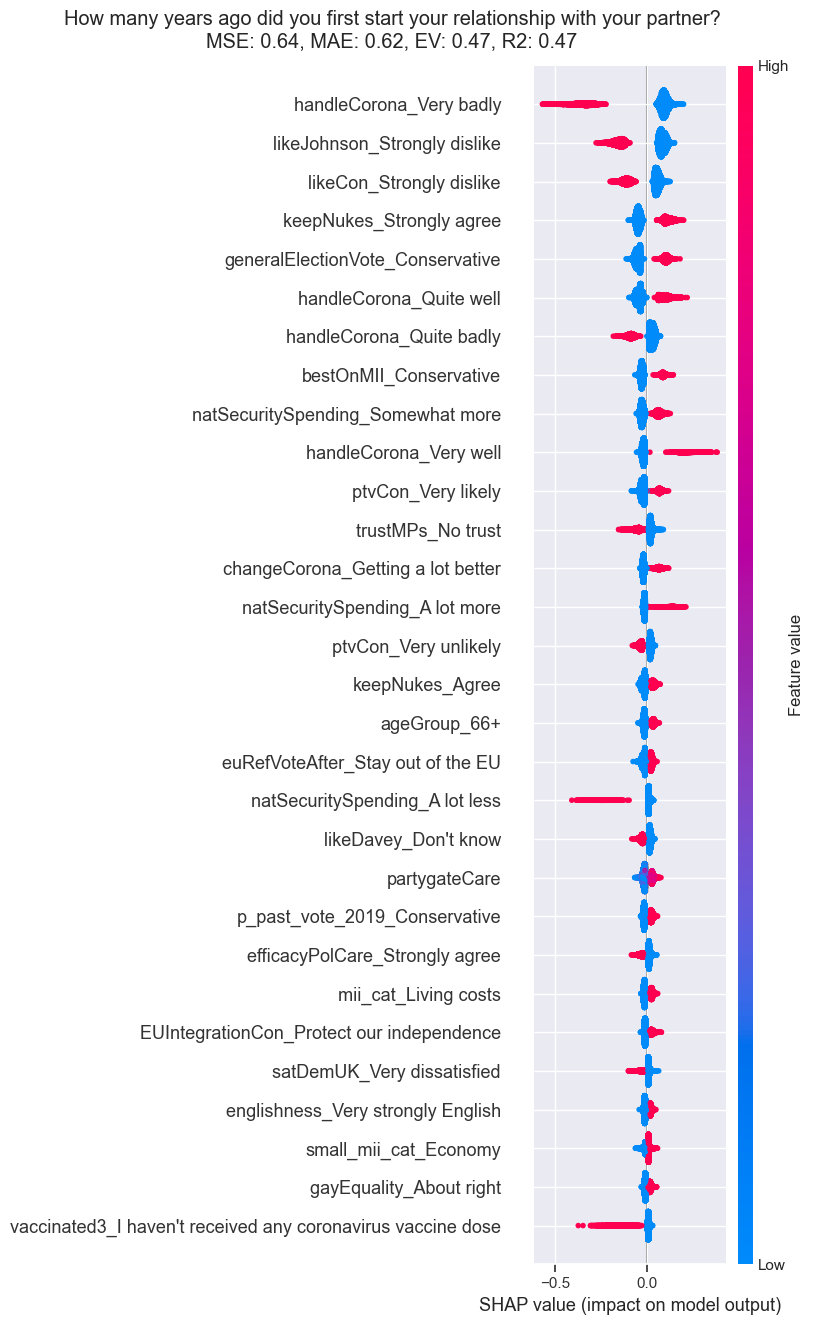

In [15]:
# handleUkraine
name="handleUkraine"

BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_num, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "How many years ago did you first start your relationship with your partner?",dataset=BES_num,
                                                    var_list = [name],var_stub_list = [name],verbosity=0)